In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange

In [2]:
#I took out commas in CSV before importing
df = pd.read_csv('cooling_summary_2015_csv.csv', na_values = ' ')  #replace blanks with NaN

In [3]:
df.dtypes

Utility                                                                       int64
State                                                                        object
Plant Code                                                                    int64
Plant Name                                                                   object
Year                                                                          int64
Month                                                                         int64
Generator ID                                                                 object
Boiler ID                                                                    object
Cooling ID                                                                   object
Generator Primary Technology                                                 object
Summer Capacity of Steam Turbines (MW)                                      float64
Gross Generation from Steam Turbines (MWh)                                  

In [4]:
df.columns

Index([u'Utility', u'State', u'Plant Code', u'Plant Name', u'Year', u'Month',
       u'Generator ID', u'Boiler ID', u'Cooling ID',
       u'Generator Primary Technology',
       u'Summer Capacity of Steam Turbines (MW)',
       u'Gross Generation from Steam Turbines (MWh)',
       u'Net Generation from Steam Turbines (MWh)',
       u'Summer Capacity Associated with Single Shaft Combined Cycle Units (MW)',
       u'Gross Generation Associated with Single Shaft Combined Cycle Units (MWh)',
       u'Net Generation Associated with Single Shaft Combined Cycle Units (MWh)',
       u'Summer Capacity Associated with Combined Cycle Gas Turbines (MW)',
       u'Gross Generation Associated with Combined Cycle Gas Turbines (MWh)',
       u'Net Generation Associated with Combined Cycle Gas Turbines (MWh)',
       u'Fuel Consumption from All Fuel Types (MMBTU)',
       u'Fuel Consumption from Steam Turbines (MMBTU)',
       u'Fuel Consumption from Single Shaft Combined Cycle Units (MMBTU)',
       u

In [5]:
#use df.columns to get list of all columns
#many NaN in each of these columns. use df['column'].describe() to examine
#use df['column'].isnull().sum() to count the number of NaN in each column

# column_list_na_to_0 = ['Summer Capacity of Steam Turbines (MW)',
#                        'Gross Generation from Steam Turbines (MWh)',
#                        'Net Generation from Steam Turbines (MWh)',
#                        'Summer Capacity Associated with Single Shaft Combined Cycle Units (MW)',
#                        'Gross Generation Associated with Single Shaft Combined Cycle Units (MWh)',
#                        'Net Generation Associated with Single Shaft Combined Cycle Units (MWh)',
#                        'Summer Capacity Associated with Combined Cycle Gas Turbines (MW)',
#                        'Gross Generation Associated with Combined Cycle Gas Turbines (MWh)',
#                        'Net Generation Associated with Combined Cycle Gas Turbines (MWh)',
#                        'Fuel Consumption from All Fuel Types (MMBTU)',
#                        'Fuel Consumption from Steam Turbines (MMBTU)',
#                        'Fuel Consumption from Single Shaft Combined Cycle Units (MMBTU)',
#                        'Fuel Consumption from Combined Cycle Gas Turbines (MMBTU)',
#                        'Coal Consumption (MMBTU)', u'Natural Gas Consumption (MMBTU)',
#                        'Petroleum Consumption (MMBTU)', 
#                        'Biomass Consumption (MMBTU)',
#                        'Other Gas Consumption (MMBTU)', 
#                        'Other Fuel Consumption (MMBTU)',
#                        'Water Withdrawal Volume (Million Gallons)',
#                        'Water Consumption Volume (Million Gallons)',
#                        'Water Withdrawal Intensity Rate (Gallons / MWh)',
#                        'Water Consumption Intensity Rate (Gallons / MWh)',
#                        'Water Withdrawal Rate per Fuel Consumption (Gallons / MMBTU)',
#                        'Water Consumption Rate per Fuel Consumption (Gallons / MMBTU)',
#                        'Cooling Unit Hours in Service',]

In [6]:
#replace nan with 0 (only if using for calculation)
#list of columns I'm using for calculations. Only replace na w/0 if using for calculation

#used to calculate total generation
df['Net Generation from Steam Turbines (MWh)'] = df['Net Generation from Steam Turbines (MWh)'].replace(np.nan, 0)
df['Net Generation Associated with Single Shaft Combined Cycle Units (MWh)'] = df['Net Generation Associated with Single Shaft Combined Cycle Units (MWh)'].replace(np.nan, 0)
df['Net Generation Associated with Combined Cycle Gas Turbines (MWh)'] = df['Net Generation Associated with Combined Cycle Gas Turbines (MWh)'].replace(np.nan, 0)

#used to calculate total capacity
df['Summer Capacity of Steam Turbines (MW)'] = df['Summer Capacity of Steam Turbines (MW)'].replace(np.nan, 0)
df['Summer Capacity Associated with Single Shaft Combined Cycle Units (MW)'] = df['Summer Capacity Associated with Single Shaft Combined Cycle Units (MW)'].replace(np.nan, 0)
df['Summer Capacity Associated with Combined Cycle Gas Turbines (MW)'] = df['Summer Capacity Associated with Combined Cycle Gas Turbines (MW)'].replace(np.nan, 0)

In [7]:
#calculate total generation by adding 3 types of generaiton
df['total generation'] = (df['Net Generation from Steam Turbines (MWh)'] +
                          df['Net Generation Associated with Single Shaft Combined Cycle Units (MWh)'] + 
                          df['Net Generation Associated with Combined Cycle Gas Turbines (MWh)'])

In [8]:
#check total generation data type
df['total generation'].dtypes

dtype('float64')

In [9]:
df['total summer capacity'] = (df['Summer Capacity of Steam Turbines (MW)'] + 
                                       df['Summer Capacity Associated with Single Shaft Combined Cycle Units (MW)'] + 
                                       df['Summer Capacity Associated with Combined Cycle Gas Turbines (MW)'])

In [10]:
#check total summer capacity data type
print df['total summer capacity'].dtypes

float64


In [11]:
#calculate gen capacity factor (df['total generation']/df['total average summer capacity'])/8760 for MONTHLY
df['generation capacity factor'] = ((df['total generation'] / df['total summer capacity']) / 8760) *100

In [12]:
#check out monthly generation capacity factors. Can't use this... too low
df['generation capacity factor'].describe()

count    15829.000000
mean         3.699468
std          2.883615
min         -2.438356
25%          0.603349
50%          3.892844
75%          6.165868
max         19.089481
Name: generation capacity factor, dtype: float64

In [13]:
#change Plant Code to a string
df['Plant Code Str'] = df['Plant Code'].astype(str)

In [14]:
#create 'Concat' to use as an agg index
df['Concat'] = df['Plant Code Str'] + df['Cooling ID']

In [15]:
#correct cooling unit hours in service by number of opreaable cooling systems
#still need to adjust by plants with cooling id = PLANT, see summary table in spreadsheet
df['Cooling Unit Hours in Service'] = df['Cooling Unit Hours in Service']/ df['Number Operable Cooling Systems']

In [16]:
#create yearly data using concat as index
#two ways to use groupby
#yearly_data = (df.set_index('Concat').groupby(level = 0)['total generation']).agg({'total gen': np.sum})

yearly_data = df.groupby('Concat').agg({'State': 'first',
                                        'Plant Name': 'first',
                                        'total generation': np.sum, 
                                        'total summer capacity': np.mean, 
                                        'Water Withdrawal Volume (Million Gallons)': np.sum,
                                        'Water Consumption Volume (Million Gallons)': np.sum,
                                        'Generator Primary Technology': 'first',
                                        'Cooling Unit Hours in Service': np.sum})

In [17]:
yearly_data

,total generation,State,Water Withdrawal Volume (Million Gallons),Generator Primary Technology,Water Consumption Volume (Million Gallons),total summer capacity,Plant Name,Cooling Unit Hours in Service
Concat,,,,,,,,
10017CT01,566979.0,VA,3679.30,Wood/Wood Waste Biomass,104.80,101.000000,WestRock-West Point Mill,8760.0
1001Many,4984247.0,IN,210606.84,Conventional Steam Coal,2105.45,995.000000,Cayuga,5840.0
10043DAE01,577780.0,NJ,526.54,Conventional Steam Coal,526.54,219.000000,Logan Generating Company LP,8002.0
1004CTWR,3107471.0,IN,3247.90,Coal Integrated Gasification Combined Cycle,2241.04,595.000000,Edwardsport,8760.0
10071UNIT1,29853.0,VA,442.58,Conventional Steam Coal,442.58,57.500000,Portsmouth Genco LLC,814.0
10071UNIT2,35887.0,VA,504.76,Conventional Steam Coal,504.76,57.500000,Portsmouth Genco LLC,939.0
10075CS1,1012650.0,MN,56370.72,Conventional Steam Coal,26.24,182.766667,Taconite Harbor Energy Center,8737.0
1007Many,795332.0,IN,32.10,Natural Gas Fired Combined Cycle,0.33,285.000000,Noblesville,2112.0
10082,267406.0,IN,14793.64,Conventional Steam Coal,0.00,140.000000,R Gallagher,3321.0


In [18]:
yearly_data['generation capacity factor'] = (yearly_data['total generation']/yearly_data['total summer capacity'])/8760

In [19]:
yearly_data['cooling system capacity factor'] = yearly_data['Cooling Unit Hours in Service']/ 8760

In [20]:
yearly_data['Cc-Cg/Cc'] = (yearly_data['cooling system capacity factor'] - yearly_data['generation capacity factor'])/yearly_data['cooling system capacity factor']

In [37]:
yearly_data['water withdrawal while not generating'] = yearly_data['Water Withdrawal Volume (Million Gallons)'] * yearly_data['Cc-Cg/Cc']

In [40]:
check1 = yearly_data['generation capacity factor'].describe()
check2 = yearly_data[yearly_data['generation capacity factor'] > 1]  # still need to adjust these using .apply
check3 = yearly_data[yearly_data['Cooling Unit Hours in Service'] > 8760]
check4 = yearly_data['Cc-Cg/Cc']

In [48]:
len(yearly_data[check4 < 0])

109

In [44]:
#no plants with cooling unit hours > 8670
check3

,total generation,State,Water Withdrawal Volume (Million Gallons),Generator Primary Technology,Water Consumption Volume (Million Gallons),total summer capacity,Plant Name,Cooling Unit Hours in Service,generation capacity factor,cooling system capacity factor,Cc-Cg/Cc,water withdrawal while not generating
Concat,,,,,,,,,,,,


In [24]:
yearly_data['Cc-Cg/Cc'].replace(np.nan, 0, inplace = True)

In [49]:
yearly_data['Cc-Cg/Cc'].isnull().sum()

0

In [50]:
yearly_data

,total generation,State,Water Withdrawal Volume (Million Gallons),Generator Primary Technology,Water Consumption Volume (Million Gallons),total summer capacity,Plant Name,Cooling Unit Hours in Service,generation capacity factor,cooling system capacity factor,Cc-Cg/Cc,water withdrawal while not generating
Concat,,,,,,,,,,,,
10017CT01,566979.0,VA,3679.30,Wood/Wood Waste Biomass,104.80,101.000000,WestRock-West Point Mill,8760.0,0.640828,1.000000,0.359172,1321.501462
1001Many,4984247.0,IN,210606.84,Conventional Steam Coal,2105.45,995.000000,Cayuga,5840.0,0.571837,0.666667,0.142244,29957.616064
10043DAE01,577780.0,NJ,526.54,Conventional Steam Coal,526.54,219.000000,Logan Generating Company LP,8002.0,0.301172,0.913470,0.670299,352.939404
1004CTWR,3107471.0,IN,3247.90,Coal Integrated Gasification Combined Cycle,2241.04,595.000000,Edwardsport,8760.0,0.596192,1.000000,0.403808,1311.528590
10071UNIT1,29853.0,VA,442.58,Conventional Steam Coal,442.58,57.500000,Portsmouth Genco LLC,814.0,0.059267,0.092922,0.362184,160.295186
10071UNIT2,35887.0,VA,504.76,Conventional Steam Coal,504.76,57.500000,Portsmouth Genco LLC,939.0,0.071247,0.107192,0.335334,169.262994
10075CS1,1012650.0,MN,56370.72,Conventional Steam Coal,26.24,182.766667,Taconite Harbor Energy Center,8737.0,0.632497,0.997374,0.365838,20622.565842
1007Many,795332.0,IN,32.10,Natural Gas Fired Combined Cycle,0.33,285.000000,Noblesville,2112.0,0.318566,0.241096,-0.321325,-10.314535
10082,267406.0,IN,14793.64,Conventional Steam Coal,0.00,140.000000,R Gallagher,3321.0,0.218041,0.379110,0.424859,6285.212896


In [27]:
data = yearly_data.pivot_table(values = 'Water Withdrawal Volume (Million Gallons)', index = 'Generator Primary Technology', aggfunc = np.sum)

In [28]:
data_bar_graph = data/365

In [29]:
data_bar_graph.values

array([  8.19835616e-01,   1.93948521e+02,   7.14088145e+04,
         5.11249063e+03,   1.24147945e+00,   8.32037603e+03,
         2.07734260e+04,   5.76683648e+04,   8.63496192e+02,
         1.02853973e+02,   5.58125260e+02,   1.53359332e+03,
         1.26210959e+00,   1.08142466e+00,   2.24341370e+02])

In [30]:
data_bar_graph.index

Index([u'All Other', u'Coal Integrated Gasification Combined Cycle',
       u'Conventional Steam Coal', u'Multiple', u'Municipal Solid Waste',
       u'Natural Gas Fired Combined Cycle', u'Natural Gas Steam Turbine',
       u'Nuclear', u'Other Gases', u'Other Waste Biomass', u'Petroleum Coke',
       u'Petroleum Liquids', u'Solar Thermal with Energy Storage',
       u'Solar Thermal without Energy Storage', u'Wood/Wood Waste Biomass'],
      dtype='object', name=u'Generator Primary Technology')

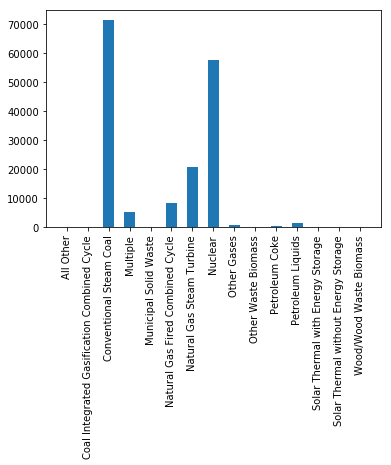

In [31]:
# axes.bar
#left = specify x coordinates of the left sides of the bar, bar_positiong
#height = specify the height of each bar, bar_heights
#width
titles = data_bar_graph.index
bar_heights = data_bar_graph.values
bar_positions = np.arange(len(bar_heights))

plt.bar(bar_positions, bar_heights, .5)
plt.xticks(bar_positions, titles, rotation = 90)
plt.show()

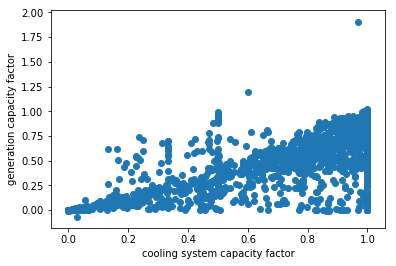

In [35]:
x = yearly_data['cooling system capacity factor']
y = yearly_data['generation capacity factor']

fig, ax = plt.subplots(1,1)
ax.scatter(x,y)
ax.set_xlabel('cooling system capacity factor')
ax.set_ylabel('generation capacity factor')
plt.show()